In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
t=np.genfromtxt('tiempofps.txt')/30.0 ##tiempo (en segundos)
L,x,y=50*10**(-2),48.5*10**(-2),12*10**(-2) ##Longitud diagonal, largo y alto de la mesa (en metros)
errr,errt=5*10**(-4),1/60 ##Error en la medición usando regla (en metros) y error en la medición del tiempo (en segundos)
a=np.arctan(y/x) ##Fórmula para el ángulo de la rampa (en radianes)
erra=(x+y)*errr/(x**2+y**2) ##Error en la medición del ángulo (en radianes)

In [2]:
g=10*L/(3*t**2*np.sin(a))
dg=(10/(3*t**2*np.sin(a)))*(errr+(L*np.cos(a)*erra/np.sin(a))+(2*L*errt/t))
print(np.mean(g))

9.134970965237699


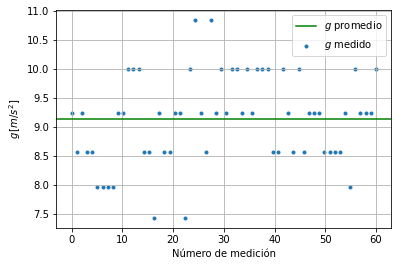

In [3]:
plt.scatter(np.linspace(0,len(g),len(g)),g,marker='.',label='$g$ medido')
plt.axhline(y=np.mean(g),color='green',linestyle='-',label='$g$ promedio')
plt.xlabel('Número de medición')
plt.ylabel('$g\,[m/s^2]$')
plt.legend()
plt.grid()
plt.savefig('grafico1.png')

In [4]:
x=np.linspace(np.min(g),np.max(g))
def f(x):
    return 1/(2*np.pi*np.std(g))**0.5*np.e**(-(x-np.mean(g))**2/(2*np.std(g)**2))

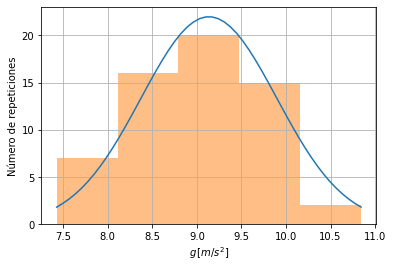

In [5]:
hist,bin_edges=np.histogram(g,bins=5)
plt.plot(x, f(x)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x))
plt.hist(g,5,alpha=0.5,rwidth=1,label='Histograma')
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()
plt.savefig('grafico2.png')

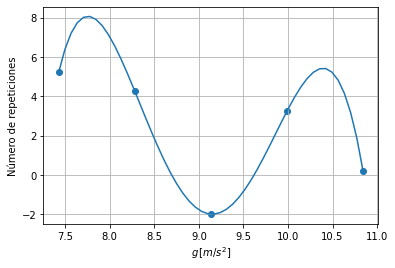

In [6]:
xx=np.linspace(np.min(g),np.max(g),5)
u=np.linspace(np.min(g),np.max(g))
plt.scatter(xx,hist-f(xx)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x),label='Error en el modelo')
c1=np.polyfit(xx,hist-f(xx)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x),4)
def p1(u):
    return c1[0]*u**4+c1[1]*u**3+c1[2]*u**2+c1[3]*u+c1[4]
plt.plot(u,p1(u))
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()
plt.savefig('grafico3.png')

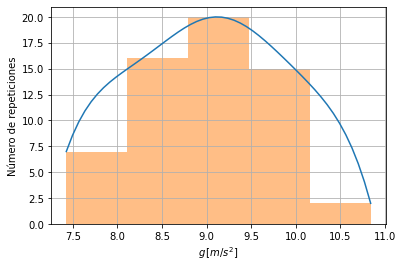

In [7]:
plt.plot(x, f(x)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x)+p1(x))
plt.hist(g,5,alpha=0.5,rwidth=1,label='Histograma')
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()
plt.savefig('grafico4.png')

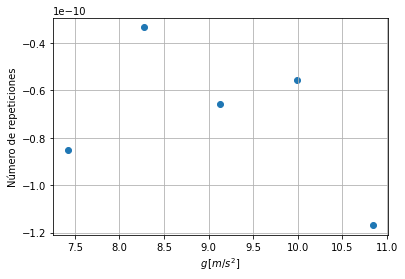

In [8]:
plt.scatter(xx,hist-f(xx)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x)-p1(xx))
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()
plt.savefig('grafico5.png')